In [30]:

!pip install numpy nibabel matplotlib scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 39.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 40.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 32.4 MB/s eta 0:00:00
  Using cached PyWavelets-1.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.8 MB)
  Using cached imageio-2.27.0-py3-none-any.whl (3.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.4 MB/s eta 0:00:0031m43.4 MB/s eta 0:00:01
  Using cached lazy_loader-0.2-py3-none-any.whl (8.6 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [6]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider


In [24]:
from pathlib import Path
root = Path.cwd().parent


In [25]:
# Load the CT scan and mask images
ct_img = nib.load(root/"dataset/1-1.nii")
mask_img1 = nib.load(root/"dataset/small_bowel.nii")
mask_img2 = nib.load(root/"dataset/1-1-label.nii")

# Get the image data and mask data
ct_data = ct_img.get_fdata()
mask_data1 = mask_img1.get_fdata()
mask_data2 = mask_img2.get_fdata()

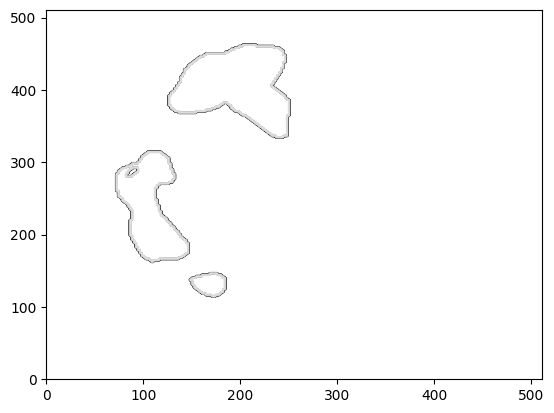

In [28]:
plt.contour(mask_data1[:, :, ct_data.shape[2]//2], cmap='gray')

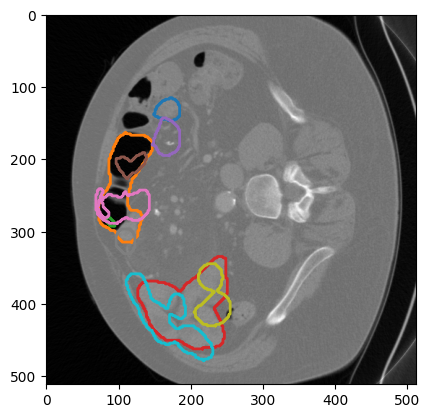

In [41]:
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np

# Load 3D CT mask data (shape: [z, y, x])
ct_mask = mask_data1[:, :, ct_data.shape[2]//2]

ct_mask2 = mask_data1[:, :, ct_data.shape[2]//2 +10]


# Find contours of the mask at a threshold of 0.5 (adjust as needed)
contours = measure.find_contours(ct_mask, 0.5)
contours2 = measure.find_contours(ct_mask2, 0.5)

fig, ax = plt.subplots()
ax.imshow(ct_data[:, :, ct_data.shape[2]//2], cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)


for contour in contours2:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
# Display the image and plot all contours found
# fig, ax = plt.subplots()
# ax.imshow(ct_mask, interpolation='nearest', cmap=plt.cm.gray)



# fig, ax = plt.subplots()
# ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)
# plt.show()


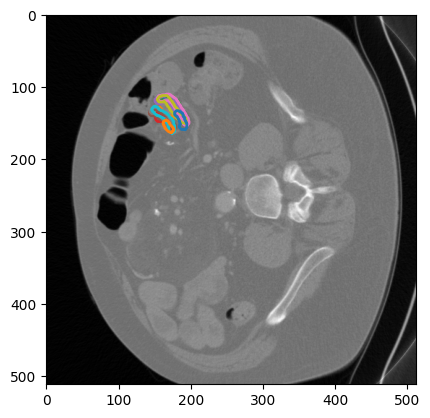

In [43]:
_,_, d = mask_data1.shape
fig, ax = plt.subplots()
ax.imshow(ct_data[:, :, ct_data.shape[2]//2], cmap=plt.cm.gray)

for i in range(d):
    ct_mask = mask_data2[:, :, i]

  


    # Find contours of the mask at a threshold of 0.5 (adjust as needed)
    contours = measure.find_contours(ct_mask, 0.5)


 

    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)


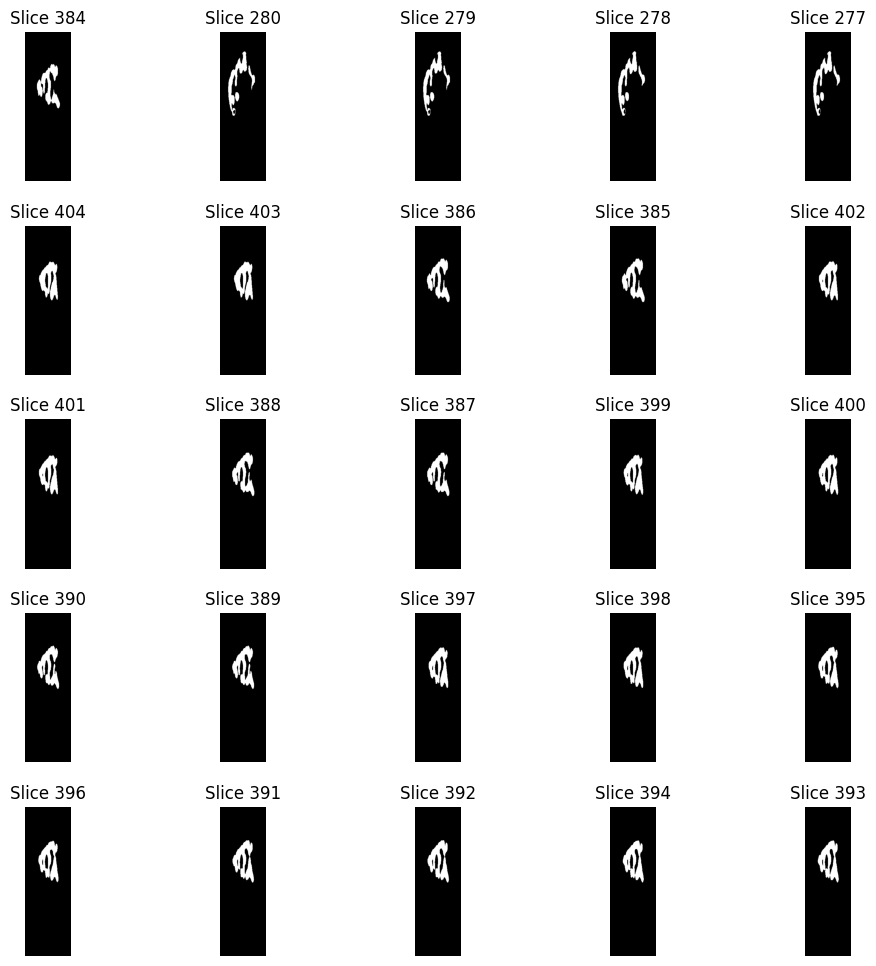

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Load 3D CT mask data (shape: [z, y, x])
ct_mask = mask_data1

# Find the indices of the slices with the highest sum along the depth dimension
slice_indices = ct_mask.sum(axis=(1, 2)).argsort()[-25:]

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))

# Loop over each subplot and display a 2D slice of the mask
for i, ax in enumerate(axes.flat):
    if i < len(slice_indices):
        ax.imshow(ct_mask[slice_indices[i]], cmap='gray')
        ax.set_title(f'Slice {slice_indices[i]}')
    ax.axis('off')
        
# Adjust spacing between subplots and display the plot
fig.subplots_adjust(hspace=0.3, wspace=0.3)



(25,)
[50 55 79 82 58 45 39 54 80 81 51 52 56 62 53 66 57 63 64 65 40 41 44 42
 43]
(512, 512, 158)


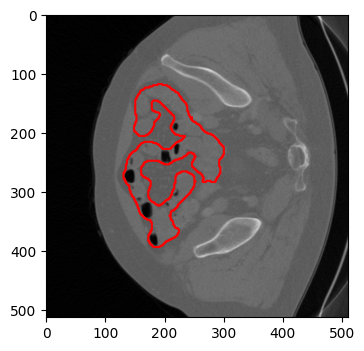

In [61]:
slice_indices = ct_mask.sum(axis=(0, 1)).argsort()[-25:]

print(slice_indices.shape)

print(slice_indices)
print(ct_mask.shape)


fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
ax.imshow(ct_data[:, :, slice_indices[-1]], cmap='gray')
ax.contour(ct_mask[:, :, slice_indices[-1]], colors='r', levels=[0.5])
